In [17]:
!pip install smart_augmentation


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
import cv2
import os
import matplotlib.pyplot as plt
from smart_augmentation import geometric, color, occlusion, noise, video, utils

In [20]:
# Helper function to display images
def show_image(img, title="Image"):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis("off")
    plt.show()

Loaded image: (178, 284, 3)


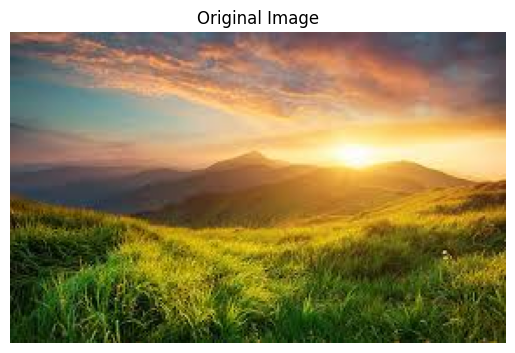

In [32]:
# ===============================
# ✅ Step 2: Load an Image
# ===============================
img_path = "Dataset/images2.jpeg"   # change if needed
image = cv2.imread(img_path)
print("Loaded image:", image.shape)
show_image(image, "Original Image")


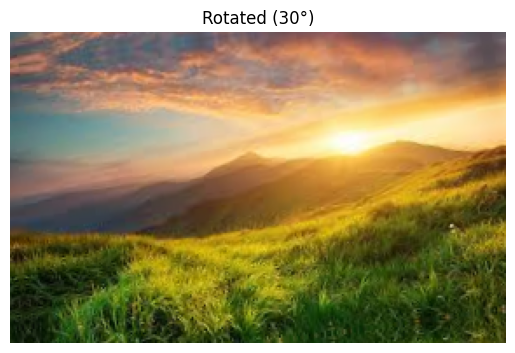

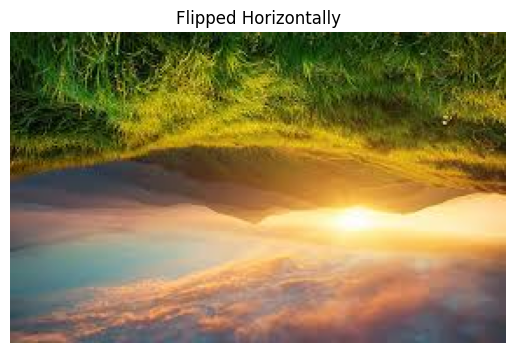

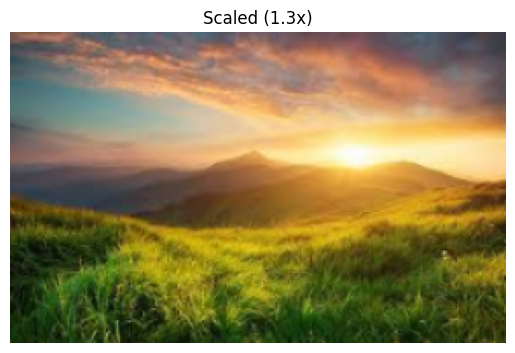

In [33]:
# ===============================
# ✅ Step 3: Test Geometric Transforms
# ===============================
rotated = geometric.rotate(image, angle=30)
flipped = geometric.flip(image, mode="vertical")
scaled = geometric.scale(image, scale_range=(0.8, 1.2))

show_image(rotated, "Rotated (30°)")
show_image(flipped, "Flipped Horizontally")
show_image(scaled, "Scaled (1.3x)")

In [42]:
import numpy as np
def show_image(img, title=""):
    img = np.clip(img, 0, 255).astype(np.uint8)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis("off")
    plt.show()


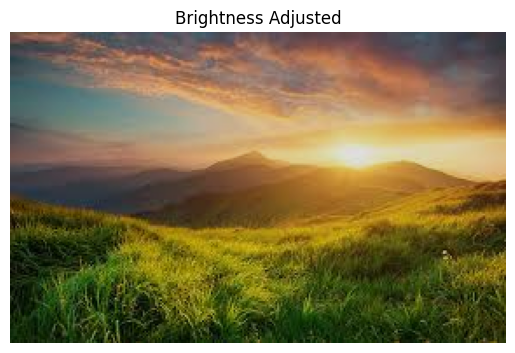

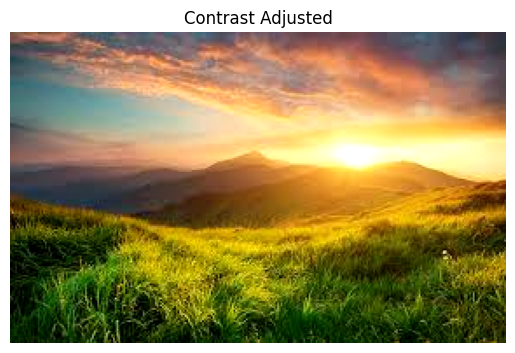

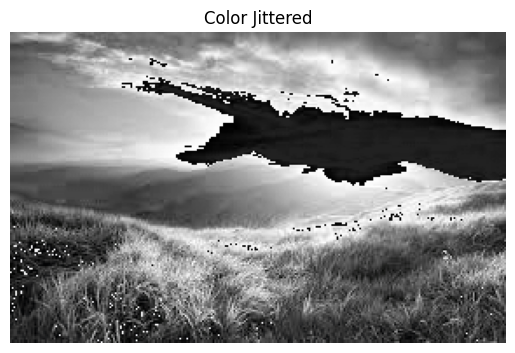

In [43]:
# ===============================
# ✅ Step 4: Test Color Transforms
# ===============================
bright = color.adjust_brightness(image)
contrasted = color.adjust_contrast(image)
jittered = color.color_jitter(image)

show_image(bright, "Brightness Adjusted")
show_image(contrasted, "Contrast Adjusted")
show_image(jittered, "Color Jittered")


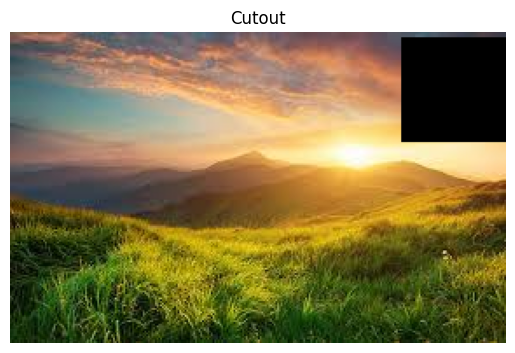

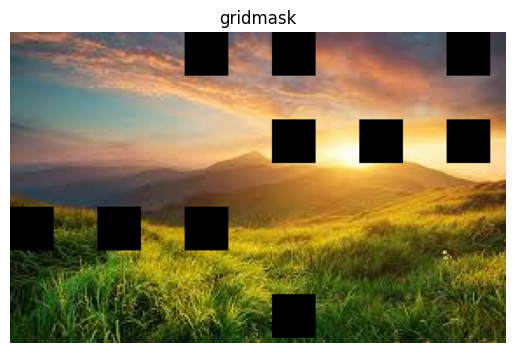

In [45]:
# ===============================
# ✅ Step 5: Test Occlusion
# ===============================
cutout_img = occlusion.cutout(image, mask_size=60)
shadowed = occlusion.gridmask(image)
show_image(cutout_img, "Cutout")
show_image(shadowed, "gridmask")


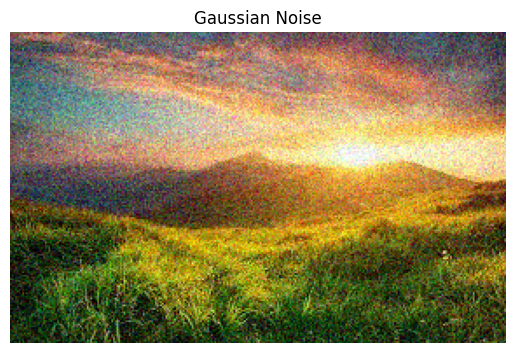

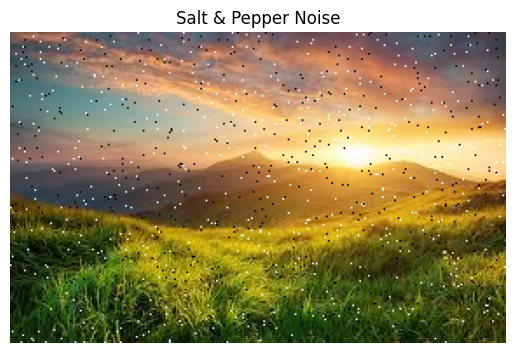

In [47]:
# ===============================
# ✅ Step 6: Test Noise
# ===============================
gaussian_img = noise.gaussian_noise(image, std=25)
sp_img = noise.salt_and_pepper(image, amount=0.02)
show_image(gaussian_img, "Gaussian Noise")
show_image(sp_img, "Salt & Pepper Noise")


In [49]:

# ===============================
# ✅ Step 8: Test Report Generation
# ===============================
report_path = "augmentation_report.txt"
utils.generate_report_for_folder("Dataset", report_path)

# Display generated report
with open(report_path, "r") as f:
    print(f.read())

cityscape.jpg: recommendations -> adjust_brightness, posterize, color_jitter, solarize, rotate, crop, flip, scale
images.jpeg: recommendations -> adjust_brightness, posterize, color_jitter, solarize, rotate, crop, flip, scale
images2.jpeg: recommendations -> posterize, color_jitter, solarize, rotate, crop, flip, scale
lena.png: recommendations -> posterize, color_jitter, solarize, rotate, flip, adjust_contrast, scale



In [50]:
# ===============================
# ✅ Step 7: Test Video Augmentation
# ===============================
input_video = "Dataset/video.mp4"  # add a short sample video
output_dir = "Augmented_Videos"
os.makedirs(output_dir, exist_ok=True)

saved_videos = video.augment_video_batch(
    input_video,
    output_dir=output_dir
)

print("Generated videos:")
for v in saved_videos:
    print("✅", v)


Generated videos:
✅ Augmented_Videos\aug_video_brightness_flicker.mp4
✅ Augmented_Videos\aug_video_temporal_noise.mp4
✅ Augmented_Videos\aug_video_random_crop.mp4
✅ Augmented_Videos\aug_video_rotation.mp4
✅ Augmented_Videos\aug_video_color_jitter.mp4
✅ Augmented_Videos\aug_video_motion_blur_temporal.mp4


In [52]:
# Load an image
image_path = "Dataset/images.jpeg"   # change to your actual image
image = cv2.imread(image_path)

# Analyze the image
report = utils.analyze_image(image)

# Print the analysis report
print("📊 Image Analysis Report:")
for key, value in report.items():
    print(f"{key}: {value}")

# Optional: visualize or save report
utils.generate_report_for_folder("Dataset", "Dataset_Report.txt")
print("\n✅ Report saved as 'Dataset_Report.txt'")

📊 Image Analysis Report:
brightness: {'score': 96.7690162572683, 'recommend': False, 'reason': 'Brightness within normal range', 'suggestions': ['adjust_brightness', 'gamma_correction', 'color_jitter']}
contrast: {'score': 55.886243098395454, 'recommend': False, 'reason': 'Contrast OK', 'suggestions': ['adjust_contrast', 'contrast_jitter', 'color_jitter']}
saturation: {'score': 60.66668644436533, 'recommend': False, 'reason': 'Saturation OK', 'suggestions': ['adjust_saturation', 'shift_hue', 'color_jitter']}
blur: {'score': 250.94891145137763, 'recommend': False, 'reason': 'Image is sharp', 'suggestions': ['gaussian_blur', 'motion_blur', 'defocus_blur', 'speckle_noise']}
occlusion: {'score': 1.977769866698311e-05, 'recommend': False, 'reason': 'No large occlusion detected', 'suggestions': ['cutout', 'hide_and_seek', 'gridmask']}
general: {'recommend': True, 'reason': 'Always useful to add geometric and color augmentations to increase dataset variety.', 'suggestions': ['flip', 'rotate',